# Assignment_1

### Import the required libraries

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [8,6]
import math
import numpy as np
import random

## 1- Linear regression with one variable from scratch

### Load the data ((ex1data1.csv)

In [3]:
data1 = pd.read_csv('./ex1data1.csv', header=None)

### Split the data into features and output
'X' is the list of features(input) and 'Y' is the list of output values

In [4]:
X = data1[0]
Y = data1[1]

### Plot the data points in the form of a Scatter Plot

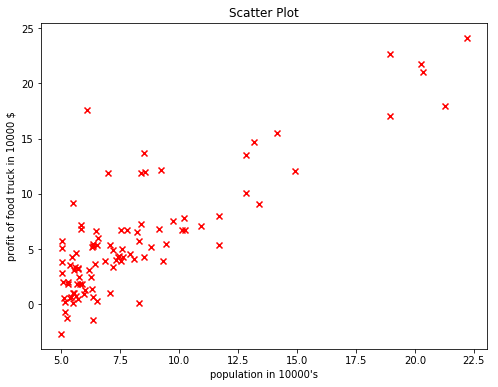

In [5]:
plt.scatter(X,Y,color="red",marker="x")
plt.xlabel("population in 10000's")
plt.ylabel("profit of food truck in 10000 $")
plt.title("Scatter Plot")
plt.show()

### Function to compute the cost with the given weights

In [6]:
def computeCost(X, Y, weights):
    """
    X is the input list
    Y is the output list
    weights is the list of weights. weights[0] corresponds to bias and weights[1] corresponds to slope.
    """
    total_cost = 0             
    for x,y in zip(X,Y):
        prediction = weights[0] + weights[1]*x
        cost = (prediction - y)**2
        total_cost = total_cost + cost
    return total_cost/len(X)

### Function to perform Gradient Descent

In [7]:
def gradientDescent(X, Y, weights, alpha, iterations):
    """
    X is the input list
    Y is the output list
    weights is the list of weights. weights[0] corresponds to bias and weights[1] corresponds to slope.
    alpha is the learning rate
    returns the final weights and cost history
    """
    i = 1
    m = len(X)          #number of samples
    cost_history = []   #list of cost after each iteration
    count = 1
    while count <= iterations:
        error0 = 0
        error1 = 0
        for x,y in zip(X,Y):
            prediction = weights[0] + weights[1]*x
            cost0 = (prediction - y)
            error0 = error0 + cost0
            cost1 = (prediction - y)*x
            error1 = error1 + cost1
        #calculate gradients 
        grad0 = (2/m)*error0
        grad1 = (2/m)*error1
        
        #adjust weights
        weights[0] = weights[0] - alpha*grad0    
        weights[1] = weights[1] - alpha*grad1
        
        #compute the cost and store it for reference

        cost_history.append(computeCost(X, Y, weights))
        count = count + 1
    min_cost_iter = cost_history.index(min(cost_history)) + 1

    return weights, cost_history, min(cost_history)

### Trying different learning rate and values
The initial weights chosen in every case is [0,0] i.e. both slope and bias are 0.

#### learning rate 0.01 

In [8]:
#learning rate 0.01 
weights01, cost_history01, min_cost01 = gradientDescent(X, Y, [0,0], 0.01, 8000)
print ("Minimum cost achieved with learning rate 0.01 is ", min_cost01)

Minimum cost achieved with learning rate 0.01 is  8.95394275195


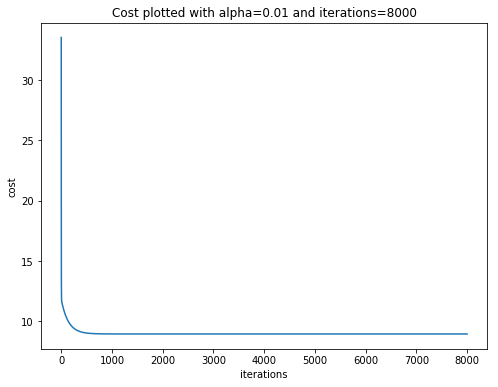

In [9]:
plt.plot(cost_history01)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.01 and iterations=8000")
plt.show()

#### learning rate 0.005

In [10]:
#learning rate 0.005 
weights005, cost_history005, min_cost005 = gradientDescent(X, Y, [0,0], 0.005, 15000)
print ("Minimum cost achieved with learning rate 0.005 is ", min_cost005)

Minimum cost achieved with learning rate 0.005 is  8.95394275195


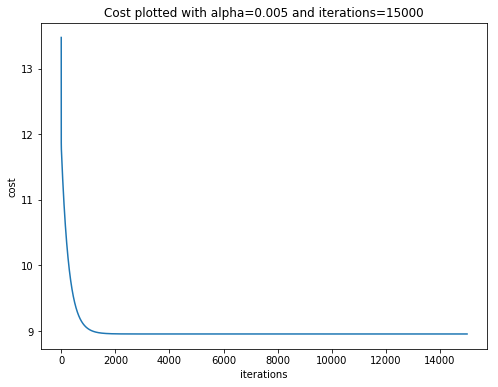

In [11]:
plt.plot(cost_history005)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.005 and iterations=15000")
plt.show()

#### learning rate 0.001

In [12]:
#learning rate 0.001
weights001, cost_history001,min_cost001 = gradientDescent(X, Y, [0,0], 0.001, 55000)
print ("Minimum cost achieved with learning rate 0.001 is ", min_cost001)

Minimum cost achieved with learning rate 0.001 is  8.95394275195


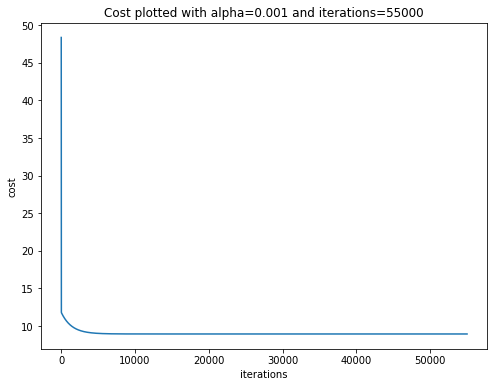

In [13]:
plt.plot(cost_history001)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.001 and iterations=55000")
plt.show()

#### learning rate 0.0001

In [14]:
#learning rate 0.0001  
weights0001, cost_history0001, min_cost0001 = gradientDescent(X, Y, [0,0], 0.0001, 500000)
print ("Minimum cost achieved with learning rate 0.0001 is ", min_cost0001)

Minimum cost achieved with learning rate 0.0001 is  8.95394275195


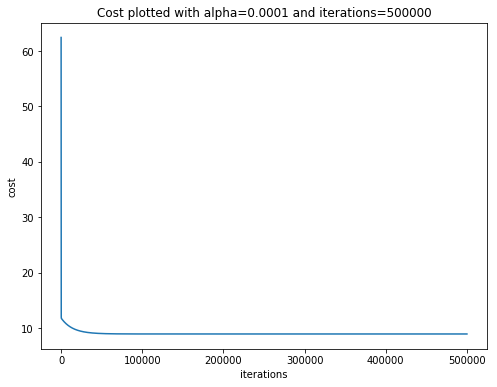

In [15]:
plt.plot(cost_history0001)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.0001 and iterations=500000")
plt.show()

### Minimum cost achieved

In [16]:
min_cost = min(min_cost0001, min_cost001, min_cost01, min_cost005)
print ("Minimum cost is achieved using learning rate 0.0001 : ", min_cost)

Minimum cost is achieved using learning rate 0.0001 :  8.95394275195


### Final Weights after Optimization

In [17]:
print ("The final weights after optimization are:")
print ("Bias (W0) = ", weights0001[0])
print ("Slope (W1) = ", weights0001[1])

The final weights after optimization are:
Bias (W0) =  -3.89578081934
Slope (W1) =  1.19303363826


In [18]:
Y_n = []
for x in X:
    y = weights0001[0] + weights0001[1]* x
    Y_n.append(y)

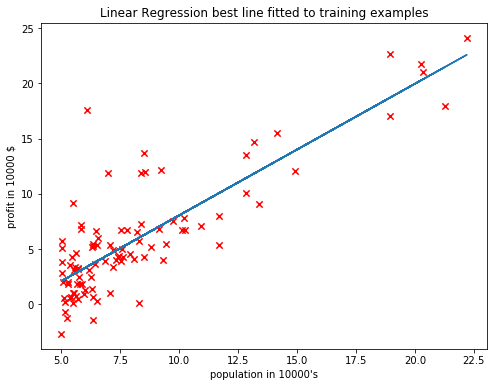

In [19]:
plt.scatter(X,Y,40,color="red",marker="x")
plt.plot(X,Y_n)
plt.xlabel("population in 10000's")
plt.ylabel("profit in 10000 $")
plt.title("Linear Regression best line fitted to training examples")
plt.show()

### Root Mean Square Error after optimization

In [20]:
RMSE = math.sqrt(min_cost)
print ("Root Mean Square Error after Optimization is: ", RMSE)

Root Mean Square Error after Optimization is:  2.9923139460876005


## 2- Linear regression with multiple variables from scratch

In [21]:
data2 = pd.read_csv('./ex1data2.csv', header=None)

### Split the data into features and output
'X' is the list of features(input) and 'Y' is the list of output values

In [22]:
X1 = data2.iloc[:, 0:2]
Y1 = data2[2]

### Data Visualization

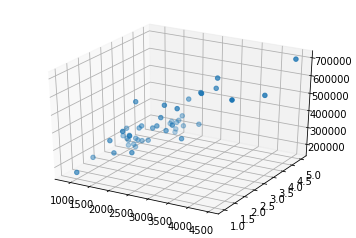

In [23]:
from mpl_toolkits import mplot3d
%matplotlib inline
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
zline = Y1
xline = X1[0]
yline = X1[1]
ax.scatter(xline, yline, zline, 'gray')


### Function to normalise the features as they are of varying scale

In [24]:
def normalizeFeature(X):
    mean0 = sum(X[0])/len(X[0])
    diff0 = [x - mean0 for x in X[0]]
    diff_sq0 = [d**2 for d in diff0]
    std0 = math.sqrt(sum(diff_sq0)/len(X[0]))
    X[0] = [(x-mean0)/std0 for x in X[0]]
    mean1 = sum(X1)/len(X[1])
    diff1 = [x - mean1 for x in X[1]]
    diff_sq1 = [d**2 for d in diff1]
    std1 = math.sqrt(sum(diff_sq1)/len(X[1]))
    X[1] = [(x-mean1)/std1 for x in X[1]]
    
    return X

In [25]:
X1_norm = normalizeFeature(X1)

In [26]:
def computeCostMulti(X, Y, weights):
    """
    X is the input list
    Y is the output list
    weights is the list of weights. weights[0] corresponds to bias and weights[1] corresponds to slope.
    """
    total_cost = 0  
    X0 = list(X[0])
    X1 = list(X[1])
    for x1,x2,y in zip(X0,X1,Y):
        prediction = weights[0] + weights[1]*x1 + weights[2]*x2
        cost = (prediction - y)**2
        total_cost = total_cost + cost
    return total_cost/len(X0)

In [27]:
def gradientDescentMulti(X, Y, weights, alpha, iterations):
    """
    X is the input list
    Y is the output list
    weights is the list of weights.
    alpha is the learning rate
    returns the final weights and cost history
    """
    X0 = list(X[0])
    X1 = list(X[1])
    m = len(X0)          #number of samples
    cost_history = []   #list of cost after each iteration
    count = 1
    while count <= iterations:
        error0 = 0
        error1 = 0
        error2 = 0
        for x1,x2,y in zip(X0,X1,Y):
            prediction = weights[0] + weights[1]*x1 + weights[2]*x2
            cost0 = (prediction - y)
            error0 = error0 + cost0
            cost1 = (prediction - y)*x1
            error1 = error1 + cost1
            cost2 = (prediction - y)*x2
            error2 = error2 + cost2
        #calculate gradients 
        grad0 = (2/m)*error0
        grad1 = (2/m)*error1
        grad2 = (2/m)*error2
        
        #adjust weights
        weights[0] = weights[0] - alpha*grad0    
        weights[1] = weights[1] - alpha*grad1
        weights[2] = weights[2] - alpha*grad2
        
        #compute the cost and store it for reference
        cost_history.append(computeCostMulti(X, Y, weights))
        count = count + 1
    min_cost_iter = cost_history.index(min(cost_history)) + 1
     
    return weights, cost_history, min(cost_history)

#### learning rate 0.01

In [28]:
#learning rate 0.01
weights_multi01, cost_history_multi01, min_cost_multi01 = gradientDescentMulti(X1_norm, Y1, [0,0,0], 0.01, 75000) 
print ("Minimum cost achieved with learning rate 0.01 is ", min_cost_multi01)

Minimum cost achieved with learning rate 0.01 is  4086560954.79


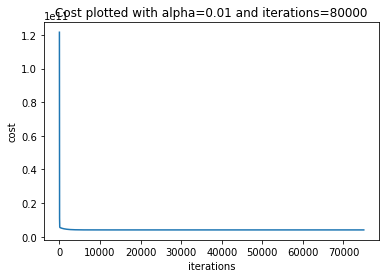

In [29]:
plt.plot(cost_history_multi01)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.01 and iterations=80000")
plt.show()

#### learning rate 0.005

In [30]:
#learning rate 0.005
weights_multi005, cost_history_multi005, min_cost_multi005 = gradientDescentMulti(X1_norm, Y1, [0,0,0], 0.005, 100000) 
print ("Minimum cost achieved with learning rate 0.005 is ", min_cost_multi005)

Minimum cost achieved with learning rate 0.005 is  4086560954.79


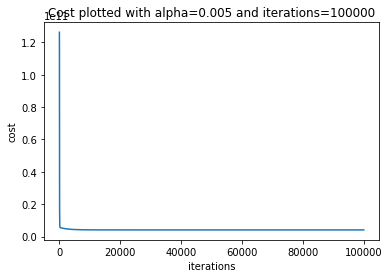

In [31]:
plt.plot(cost_history_multi005)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.005 and iterations=100000")
plt.show()

#### learning rate 0.001

In [32]:
#learning rate 0.001
weights_multi001, cost_history_multi001, min_cost_multi001 = gradientDescentMulti(X1_norm, Y1, [0,0,0], 0.001, 550000) 
print ("Minimum cost achieved with learning rate 0.001 is ", min_cost_multi001)

Minimum cost achieved with learning rate 0.001 is  4086560954.79


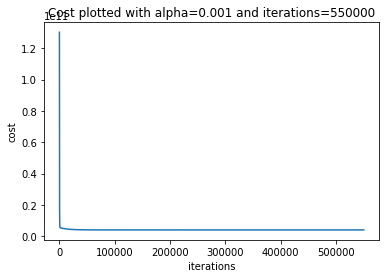

In [33]:
plt.plot(cost_history_multi001)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.001 and iterations=550000")
plt.show()

#### learning rate 0.0001

In [35]:
weights_multi0001, cost_history_multi0001, min_cost_multi0001 = gradientDescentMulti(X1_norm, Y1, [0,0,0], 0.0001, \
                                                                                     3500000) 
print ("Minimum cost achieved with learning rate 0.0001 is ", min_cost_multi0001)

Minimum cost achieved with learning rate 0.0001 is  4086560954.79


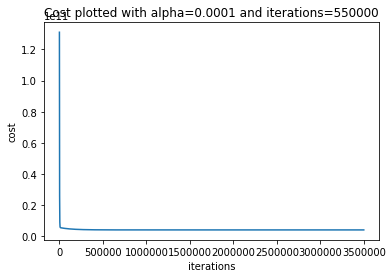

In [36]:
plt.plot(cost_history_multi0001)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.0001 and iterations=550000")
plt.show()

### Minimum cost achieved


In [37]:
min_cost_multi = min(min_cost_multi0001, min_cost_multi001, min_cost_multi01, min_cost_multi005)
print ("Minimum cost is achieved using learning rate 0.0001 : ", min_cost_multi)

Minimum cost is achieved using learning rate 0.0001 :  4086560954.79


### Final Weights after Optimization

In [38]:
print ("The final weights after optimization are:")
print ("Bias (W0) = ", weights_multi0001[0])
print ("Size (W1) = ", weights_multi0001[1])
print ("Bedrooms (W2) = ", weights_multi0001[2])

The final weights after optimization are:
Bias (W0) =  367927.496131
Size (W1) =  109447.710932
Bedrooms (W2) =  -28290.1619623


### Root Mean Square Error after optimization

In [39]:
RMSE_multi = math.sqrt(min_cost_multi)
print ("Root Mean Square Error in House prices after Optimization is: ", RMSE_multi)

Root Mean Square Error in House prices after Optimization is:  63926.21492615637


## 2-1 Linear regression with multiple variables using Matrix

### Convert the data2 dataframe to numpy array

In [40]:
data2_array = np.array(data2)

### Split the data into features and output matrix
'X_mat' is the list of features(input) and 'Y_mat' is the list of output values

In [41]:
X_mat = data2_array[::, :2]
Y_mat = data2_array[::, 2:]

### Normalize the features as they have different scales

In [42]:
from scipy import stats
X_mat_norm = stats.zscore(X_mat)

In [43]:
bias = np.ones((X_mat_norm.shape[0],X_mat_norm.shape[1]+1))
bias[:,1:] = X_mat_norm
X_b = bias
random.seed(30)
weights = np.random.rand(3,1)

In [44]:
def computeCostMultiMat(X,Y,weights):
    m = X.shape[0]
    n = X.shape[1]
    prediction = np.dot(X, weights)
    return (1/m)*((np.square(prediction-Y)).sum(axis=0))

In [45]:
def gradientDescentMultiMat(X, Y, weights, alpha, iterations):
    m = len(Y)  
    count = 1
    cost_history = []
    while(count <= iterations):
        prediction = np.dot(X, weights)
        cost = prediction - Y
        grad = (2/m)*(np.dot(X.transpose(), cost))
        weights = weights - (alpha*grad)
        cost_history.append(computeCostMultiMat(X, Y, weights)[0])
        count = count + 1
    min_cost_iter = cost_history.index(min(cost_history)) + 1

    return weights, cost_history, min(cost_history)

#### learning rate 0.01

In [46]:
weights_multi_mat01, cost_history_multi_mat01, min_cost_multi_mat01 = gradientDescentMultiMat(X_b, Y_mat, weights, \
                                                                                              0.01, 3000)
print ("Minimum cost achieved with learning rate 0.01 is ", min_cost_multi_mat01)

Minimum cost achieved with learning rate 0.01 is  4086560954.79


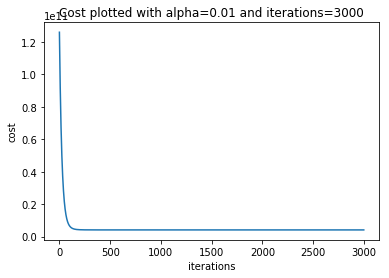

In [47]:
plt.plot(cost_history_multi_mat01)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.01 and iterations=3000")
plt.show()

#### learning rate 0.005

In [48]:
weights_multi_mat005, cost_history_multi_mat005, min_cost_multi_mat005 = gradientDescentMultiMat(X_b, Y_mat, weights, \
                                                                                                 0.005, 8000)
print ("Minimum cost achieved with learning rate 0.005 is ", min_cost_multi_mat005)

Minimum cost achieved with learning rate 0.005 is  4086560954.79


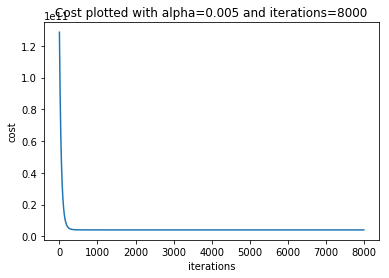

In [49]:
plt.plot(cost_history_multi_mat005)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.005 and iterations=8000")
plt.show()

#### learning rate 0.001

In [50]:
weights_multi_mat001, cost_history_multi_mat001, min_cost_multi_mat001 = gradientDescentMultiMat(X_b, Y_mat, weights, \
                                                                                                 0.001, 30000)
print ("Minimum cost achieved with learning rate 0.001 is ", min_cost_multi_mat001)

Minimum cost achieved with learning rate 0.001 is  4086560954.79


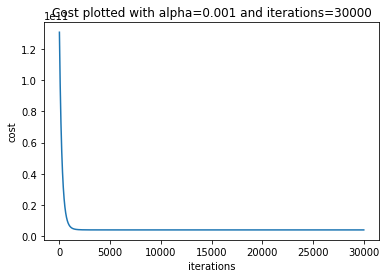

In [51]:
plt.plot(cost_history_multi_mat001)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.001 and iterations=30000")
plt.show()

#### learning rate 0.0001


In [52]:
weights_multi_mat0001, cost_history_multi_mat0001, min_cost_multi_mat0001 = gradientDescentMultiMat(X_b, Y_mat, weights, \
                                                                                                    0.0001, 250000)
print ("Minimum cost achieved with learning rate 0.0001 is ", min_cost_multi_mat0001)

Minimum cost achieved with learning rate 0.0001 is  4086560954.79


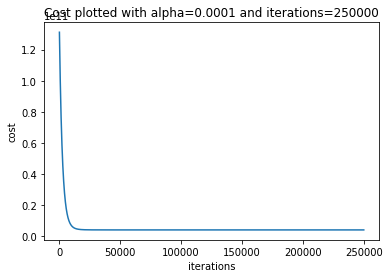

In [53]:
plt.plot(cost_history_multi_mat0001)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.0001 and iterations=250000")
plt.show()

### Minimum cost achieved

In [54]:
min_cost_multi_mat = min(min_cost_multi_mat0001, min_cost_multi_mat001, \
                         min_cost_multi_mat01, min_cost_multi_mat005)
print ("Minimum cost is achieved using learning rate 0.01 : ", min_cost_multi_mat)

Minimum cost is achieved using learning rate 0.01 :  4086560954.79


### Final Weights after Optimization

In [55]:
print ("The final weights after optimization are:")
print ("Bias (W0) = ", weights_multi_mat01[0][0])
print ("Size (W1) = ", weights_multi_mat01[1][0])
print ("Bedrooms (W2) = ", weights_multi_mat01[2][0])

The final weights after optimization are:
Bias (W0) =  340412.765957
Size (W1) =  109447.765519
Bedrooms (W2) =  -6578.2767901


### Root Mean Square Error after optimization

In [56]:
RMSE_multi_mat = math.sqrt(min_cost_multi_mat)
print ("Root Mean Square Error in House prices after Optimization is: ", RMSE_multi_mat)

Root Mean Square Error in House prices after Optimization is:  63926.214926156375


## 2-2. Linear regression with multiple variables using Normal equation

### If the data used is the same normalized data used in the Matrix implementation, the weights, minimum cost and RMSE are same as the matrix implementation

In [57]:
X_norm_eq = X_b
Y_norm_eq = Y_mat

### Normal Equation Implementation 

In [58]:
optimized_weights_norm = (((np.linalg.inv(X_norm_eq.transpose().dot(X_norm_eq))).dot(X_norm_eq.transpose()))).dot(Y_norm_eq)

### Optimized Weights

In [59]:
print ("The final weights after optimization are:")
print ("Bias (W0) = ", optimized_weights_norm[0][0])
print ("Size (W1) = ", optimized_weights_norm[1][0])
print ("Bedrooms (W2) = ", optimized_weights_norm[2][0])

The final weights after optimization are:
Bias (W0) =  340412.765957
Size (W1) =  109447.765519
Bedrooms (W2) =  -6578.27679028


### Minimum Cost Achieved

In [60]:
min_cost_norm_eq = computeCostMultiMat(X_norm_eq, Y_norm_eq, optimized_weights_norm)
print ("Minimum cost is achieved using Normal Equation with normalised data : ", min_cost_norm_eq[0])

Minimum cost is achieved using Normal Equation with normalised data :  4086560954.79


### Root Mean Square Error after Optimization

In [61]:
RMSE_norm_eq = math.sqrt(min_cost_norm_eq)
print ("Root Mean Square Error in House prices after Optimization is: ", RMSE_norm_eq)

Root Mean Square Error in House prices after Optimization is:  63926.2149261564


### If the data used is not normalized, the weights are different as the scale of data is different but the minimum cost and RMSE are  same as the matrix implementation.

In [62]:
bias_eq = np.ones((X_mat.shape[0],X_mat.shape[1]+1))
bias_eq[:,1:] = X_mat
X_b_eq = bias_eq
random.seed(30)
weights = np.random.rand(3,1)

X_eq = X_b_eq
Y_eq = Y_mat

### Normal Equation Implementation

In [63]:
optimized_weights_eq = (((np.linalg.inv(X_eq.transpose().dot(X_eq))).dot(X_eq.transpose()))).dot(Y_eq)

### Optimized Weights

In [64]:
print ("The final weights after optimization are:")
print ("Bias (W0) = ", optimized_weights_eq[0][0])
print ("Size (W1) = ", optimized_weights_eq[1][0])
print ("Bedrooms (W2) = ", optimized_weights_eq[2][0])

The final weights after optimization are:
Bias (W0) =  89597.765961
Size (W1) =  139.21063465
Bedrooms (W2) =  -8737.91542019


### Minimum Cost Achieved

In [65]:
min_cost_eq = computeCostMultiMat(X_eq, Y_eq, optimized_weights_eq)
print ("Minimum cost is achieved using Normal Equation without normalised data : ", min_cost_eq[0])

Minimum cost is achieved using Normal Equation without normalised data :  4086560954.79


### Root Mean Square Error after optimization

In [66]:
RMSE_eq = math.sqrt(min_cost_eq)
print ("Root Mean Square Error in House prices after Optimization is: ", RMSE_eq)

Root Mean Square Error in House prices after Optimization is:  63926.214926156405


## 3- Linear regression with multiple variables

## 3-1. Linear regression with multiple variables using matrix

In [67]:
data_cal = pd.read_csv('./ex1data3.csv')

### Convert the data2 dataframe to numpy array

In [68]:
data_cal_array = np.array(data_cal)
data_cal_array.shape

(20640, 10)

### Split the data into features and output matrix
'X_mat_cal' is the list of features(input) and 'Y_mat_cal' is the list of output values

In [69]:
X_mat_cal = data_cal_array[::, 1:9]
Y_mat_cal = data_cal_array[::, 9:]

### Normalize the features as they have different scales

In [70]:
X_mat_cal_norm = stats.zscore(X_mat_cal)

In [71]:
bias_cal = np.ones((X_mat_cal_norm.shape[0],X_mat_cal_norm.shape[1]+1))
bias_cal[:,1:] = X_mat_cal_norm
X_cal_b = bias_cal
random.seed(30)
weights_cal = np.random.rand(X_cal_b.shape[1],1)

In [72]:
def computeCostMultiMat(X,Y,weights):
    m = X.shape[0]
    n = X.shape[1]
    prediction = np.dot(X, weights)
    return (1/(m))*((np.square(prediction-Y)).sum(axis=0))

In [73]:
def gradientDescentMultiMat(X, Y, weights, alpha, iterations):
    m = len(Y)  
    count = 1
    cost_history = []
    while(count <= iterations):
        prediction = np.dot(X, weights)
        cost = prediction - Y
        grad = (2/m)*(np.dot(X.transpose(), cost))
        weights = weights - (alpha*grad)
        cost_history.append(computeCostMultiMat(X, Y, weights)[0])
        count = count + 1
    min_cost_iter = cost_history.index(min(cost_history)) + 1
    
    return weights, cost_history, min(cost_history)

#### learning rate 0.01

In [74]:
weights_cal01, cost_history_cal01, min_cost_cal01 = gradientDescentMultiMat(X_cal_b, Y_mat_cal, weights_cal, 0.01, 25000)
print ("Minimum cost achieved with learning rate 0.01 is ", min_cost_cal01)

Minimum cost achieved with learning rate 0.01 is  0.524320986185


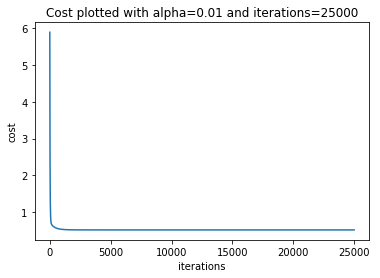

In [75]:
plt.plot(cost_history_cal01)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.01 and iterations=25000")
plt.show()

#### learning rate 0.005

In [76]:
weights_cal005, cost_history_cal005, min_cost_cal005 = gradientDescentMultiMat(X_cal_b, Y_mat_cal, weights_cal, \
                                                                               0.005, 45000)
print ("Minimum cost achieved with learning rate 0.01 is ", min_cost_cal005)

Minimum cost achieved with learning rate 0.01 is  0.524320986185


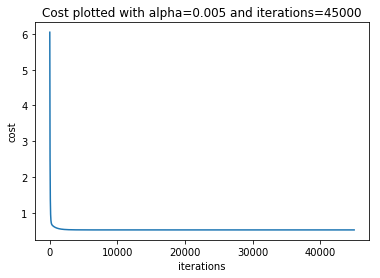

In [77]:
plt.plot(cost_history_cal005)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.005 and iterations=45000")
plt.show()

#### learning rate 0.001
The minimum cost with this learning rate is achieved at iteration number 195073.

In [78]:
weights_cal001, cost_history_cal001, min_cost_cal001 = gradientDescentMultiMat(X_cal_b, Y_mat_cal, weights_cal, \
                                                                               0.001, 250000)
print ("Minimum cost achieved with learning rate 0.001 is ", min_cost_cal001)

Minimum cost achieved with learning rate 0.001 is  0.524320986185


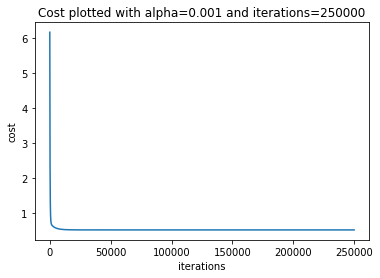

In [79]:
plt.plot(cost_history_cal001)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.001 and iterations=250000")
plt.show()

#### learning rate 0.0001

In [80]:
weights_cal0001, cost_history_cal0001, min_cost_cal0001 = gradientDescentMultiMat(X_cal_b, Y_mat_cal, weights_cal, \
                                                                               0.0001, 2400000)
print ("Minimum cost achieved with learning rate 0.0001 is ", min_cost_cal0001)

Minimum cost achieved with learning rate 0.0001 is  0.524320986185


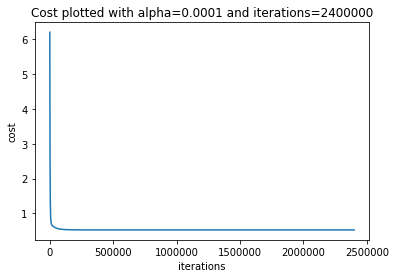

In [81]:
plt.plot(cost_history_cal0001)
plt.xlabel("iterations")
plt.ylabel("cost")
plt.title("Cost plotted with alpha=0.0001 and iterations=2400000")
plt.show()

### Minimum cost achieved

In [82]:
min_cost_cal = min(min_cost_cal0001, min_cost_cal001, \
                         min_cost_cal01, min_cost_cal005)
print ("Minimum cost is achieved using learning rate 0.0001 : ", min_cost_cal)

Minimum cost is achieved using learning rate 0.0001 :  0.524320986185


### Final Weights after Optimization

In [83]:
print ("The final weights after optimization are:")
print ("W0 (intercept) = ", weights_cal0001[0][0])
print ("W1 = ", weights_cal0001[1][0])
print ("W2 = ", weights_cal0001[2][0])
print ("W3 = ", weights_cal0001[3][0])
print ("W4 = ", weights_cal0001[4][0])
print ("W5 = ", weights_cal0001[5][0])
print ("W6 = ", weights_cal0001[6][0])
print ("W7 = ", weights_cal0001[7][0])
print ("W8 = ", weights_cal0001[8][0])

The final weights after optimization are:
W0 (intercept) =  2.06855816909
W1 =  0.829619304364
W2 =  0.118751651228
W3 =  -0.265526879665
W4 =  0.305696229935
W5 =  -0.00450300130808
W6 =  -0.0393262669813
W7 =  -0.899885654223
W8 =  -0.870541002154


### Root Mean Square Error after optimization

In [84]:
RMSE_cal = math.sqrt(min_cost_cal)
print ("Root Mean Square Error in House prices after Optimization is: ", RMSE_cal)

Root Mean Square Error in House prices after Optimization is:  0.7241001216576542


## 3-2. Linear regression with multiple variables using Normal equation

### If the data used is the same normalized data used in the Matrix implementation, the weights, minimum cost and RMSE are same as the matrix implementation

In [85]:
X_norm_cal = X_cal_b
Y_norm_cal = Y_mat_cal

### Optimized Weights

In [86]:
optimized_weights_norm_cal = (((np.linalg.inv(X_norm_cal.transpose().dot(X_norm_cal))).dot(X_norm_cal.transpose()))).dot(Y_norm_cal)

In [87]:
print ("The final weights after optimization are:")
print ("W0 (intercept) = ", optimized_weights_norm_cal[0][0])
print ("W1 = ", optimized_weights_norm_cal[1][0])
print ("W2 = ", optimized_weights_norm_cal[2][0])
print ("W3 = ", optimized_weights_norm_cal[3][0])
print ("W4 = ", optimized_weights_norm_cal[4][0])
print ("W5 = ", optimized_weights_norm_cal[5][0])
print ("W6 = ", optimized_weights_norm_cal[6][0])
print ("W7 = ", optimized_weights_norm_cal[7][0])
print ("W8 = ", optimized_weights_norm_cal[8][0])

The final weights after optimization are:
W0 (intercept) =  2.06855816909
W1 =  0.82961930428
W2 =  0.118751651212
W3 =  -0.265526879506
W4 =  0.305696229804
W5 =  -0.00450300131264
W6 =  -0.0393262669782
W7 =  -0.899885654415
W8 =  -0.870541002336


### Minimum Cost Achieved

In [88]:
min_cost_norm_eq_cal = computeCostMultiMat(X_norm_cal, Y_norm_cal, optimized_weights_norm_cal)
print ("Minimum cost is achieved using Normal Equation with normalised data : ", min_cost_norm_eq_cal[0])

Minimum cost is achieved using Normal Equation with normalised data :  0.524320986185


### Root Mean Square Error after optimization

In [89]:
RMSE_norm_eq_cal = math.sqrt(min_cost_norm_eq_cal)
print ("Root Mean Square Error in House prices after Optimization is: ", RMSE_norm_eq_cal)

Root Mean Square Error in House prices after Optimization is:  0.7241001216576544


### If the data used is not normalized, the weights are different as the scale of data is different but the minimum cost and RMSE are  same as the matrix implementation.

In [90]:
bias_cal_eq = np.ones((X_mat_cal.shape[0],X_mat_cal.shape[1]+1))
bias_cal_eq[:,1:] = X_mat_cal
X_cal_b_eq = bias_cal_eq
random.seed(30)
weights_cal = np.random.rand(X_cal_b_eq.shape[1],1)

X_eq_cal = X_cal_b_eq
Y_eq_cal = Y_mat_cal

### Normal Equation Implementation

In [91]:
optimized_weights_eq_cal = (((np.linalg.inv(X_eq_cal.transpose().dot(X_eq_cal))).dot(X_eq_cal.transpose()))).dot(Y_eq_cal)

### Optimized Weights

In [92]:
print ("The final weights after optimization are:")
print ("W0 (intercept) = ", optimized_weights_eq_cal[0][0])
print ("W1 = ", optimized_weights_eq_cal[1][0])
print ("W2 = ", optimized_weights_eq_cal[2][0])
print ("W3 = ", optimized_weights_eq_cal[3][0])
print ("W4 = ", optimized_weights_eq_cal[4][0])
print ("W5 = ", optimized_weights_eq_cal[5][0])
print ("W6 = ", optimized_weights_eq_cal[6][0])
print ("W7 = ", optimized_weights_eq_cal[7][0])
print ("W8 = ", optimized_weights_eq_cal[8][0])


The final weights after optimization are:
W0 (intercept) =  -36.9419202059
W1 =  0.436693293137
W2 =  0.00943577803346
W3 =  -0.107322041394
W4 =  0.645065693532
W5 =  -3.97638942069e-06
W6 =  -0.00378654265501
W7 =  -0.421314377514
W8 =  -0.43451375466


### Minimum Cost Achieved

In [93]:
min_cost_eq_cal = computeCostMultiMat(X_eq_cal, Y_eq_cal, optimized_weights_eq_cal)
print ("Minimum cost is achieved using Normal Equation without normalised data : ", min_cost_eq_cal[0])

Minimum cost is achieved using Normal Equation without normalised data :  0.524320986185


### Root Mean Square Error after optimization



In [94]:
RMSE_eq_cal = math.sqrt(min_cost_eq_cal)
print ("Root Mean Square Error in House prices after Optimization is: ", RMSE_eq_cal)

Root Mean Square Error in House prices after Optimization is:  0.7241001216576544


## 3-3. Linear regression with multiple variables using scikit-learn linear regression model

### Fit the Linear Regression Model

In [95]:
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error

X_sk = X_mat_cal_norm
Y_sk = Y_mat_cal

regr = LinearRegression()
regr.fit(X_sk, Y_sk)

/Users/manika/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Optimized Weights

In [96]:
print ("The final weights after optimization are:")
print ("W0 (Intercept) = ", regr.intercept_[0])
print ("W1 = ", regr.coef_[0][0])
print ("W2 = ", regr.coef_[0][1])
print ("W3 = ", regr.coef_[0][2])
print ("W4 = ", regr.coef_[0][3])
print ("W5 = ", regr.coef_[0][4])
print ("W6 = ", regr.coef_[0][5])
print ("W7 = ", regr.coef_[0][6])
print ("W8 = ", regr.coef_[0][7])

The final weights after optimization are:
W0 (Intercept) =  2.06855816909
W1 =  0.82961930428
W2 =  0.118751651212
W3 =  -0.265526879506
W4 =  0.305696229804
W5 =  -0.00450300131264
W6 =  -0.0393262669782
W7 =  -0.899885654415
W8 =  -0.870541002336


### Minimum Cost

In [97]:
prediction = regr.predict(X_sk)
min_cost_sk = mean_squared_error(prediction, Y_sk)
print ("Minimum cost achieved : ", min_cost_sk)

Minimum cost achieved :  0.524320986185


### Root Mean Square Error after optimization

In [98]:
RMSE_sk = math.sqrt(min_cost_sk)
print ("Root Mean Square Error in House prices after Optimization is: ", RMSE_sk)

Root Mean Square Error in House prices after Optimization is:  0.7241001216576544


## 3-4. Linear regression with multiple variables using TensorFlow

In [99]:
import tensorflow as tf

/Users/manika/anaconda3/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [100]:
X_tf = X_cal_b
Y_tf = Y_mat_cal

In [101]:
X = tf.placeholder(tf.float32,[None,X_tf.shape[1]])
Y = tf.placeholder(tf.float32,[None,1])
W = tf.Variable(tf.ones([X_tf.shape[1],1]))

prediction = tf.matmul(X, W)
cost = tf.reduce_mean(tf.square(prediction - Y))

In [102]:
def model_run(X_tf, Y_tf, prediction, cost, alpha, epochs):
    cost_history = []
    training = tf.train.GradientDescentOptimizer(alpha).minimize(cost)
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch in range(epochs):
            sess.run(training,feed_dict={X:X_tf,Y:Y_tf})
            cost_history.append(sess.run(cost,feed_dict={X: X_tf,Y: Y_tf}))
        
        pred = sess.run(prediction, feed_dict={X: X_tf})
        RMSE_tf = tf.sqrt(tf.reduce_mean(tf.square(pred - Y_tf)))
        rmse = math.sqrt(sess.run(RMSE_tf))
        
    return rmse, cost_history

#### learning rate 0.01

In [103]:
RMSE_tf01, cost_history_tf01 = model_run(X_tf, Y_tf, prediction, cost, 0.01, 15000)
print ("Root Mean Square Error with learning rate 0.01: ", RMSE_tf01)

Root Mean Square Error with learning rate 0.01:  0.8509407268162384


#### learning rate 0.005

In [104]:
RMSE_tf005, cost_history_tf005 = model_run(X_tf, Y_tf, prediction, cost, 0.005, 10000)
print ("Root Mean Square Error with learning rate 0.005: ", RMSE_tf005)

Root Mean Square Error with learning rate 0.005:  0.8509473453820653


#### learning rate 0.001

In [105]:
RMSE_tf001, cost_history_tf001 = model_run(X_tf, Y_tf, prediction, cost, 0.001, 50000)
print ("Root Mean Square Error with learning rate 0.001: ", RMSE_tf001) 

Root Mean Square Error with learning rate 0.001:  0.8509474022000362


#### learning rate 0.0001

In [111]:
RMSE_tf0001, cost_history_tf0001 = model_run(X_tf, Y_tf, prediction, cost, 0.0001, 1000000)
print ("Root Mean Square Error with learning rate 0.0001: ", RMSE_tf0001) 

Root Mean Square Error with learning rate 0.0001:  0.8509414809674424


### Minimum Cost achieved

In [113]:
print ("Minimum cost achieved : ", RMSE_tf0001**2)

Minimum cost achieved :  0.724101404031064


### Root Mean Square Error after Optimization

In [114]:
print ("Root Mean Square Error with learning rate 0.0001: ", RMSE_tf0001) 

Root Mean Square Error with learning rate 0.0001:  0.8509414809674424
